### **Write a Python program for the Chronic Kidney Disease dataset and perform the following tasks:**
1. Analyze and preprocess the data to check if there are any null values. If any null values are found, replace them with NaN.
2. Check if the class label is balanced. If it's not balanced, perform oversampling of the minority class.
3. Use boxplot to identify outliers in the data, remove outliers using Z-score and draw a heatmap to identify irrelevant data and plot the correlated data.
4. Classify the Chronic Kidney Disease dataset by using logistic regression,
Adaboost algorithm, K nearest neighbors, random forest algorithms and
find the accuracy of each of the algorithms using a confusion matrix


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(color_codes=True)

In [ ]:
df=pd.read_csv('ChronicDataset.csv')
df

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,80.0,1.020,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0,1
1,50.0,1.020,4.0,0.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0,1
2,80.0,1.010,2.0,3.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0,1
3,70.0,1.005,4.0,0.0,1.0,56.0,3.8,111.00,2.50,11.2,6700.0,3.90,1.0,1
4,80.0,1.010,2.0,0.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,80.0,1.020,0.0,0.0,1.0,49.0,0.5,150.00,4.90,15.7,6700.0,4.90,0.0,0
396,70.0,1.025,0.0,0.0,1.0,31.0,1.2,141.00,3.50,16.5,7800.0,6.20,0.0,0
397,80.0,1.020,0.0,0.0,1.0,26.0,0.6,137.00,4.40,15.8,6600.0,5.40,0.0,0
398,60.0,1.025,0.0,0.0,1.0,50.0,1.0,135.00,4.90,14.2,7200.0,5.90,0.0,0


<Axes: xlabel='Htn', ylabel='count'>

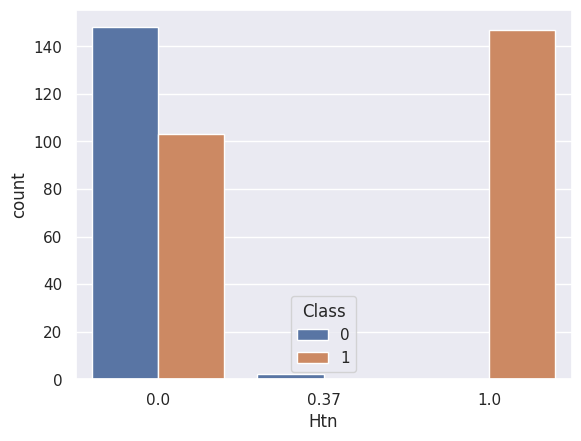

In [ ]:
sns.countplot(x=df.Htn,hue=df.Class)

<Axes: xlabel='Rbcc', ylabel='count'>

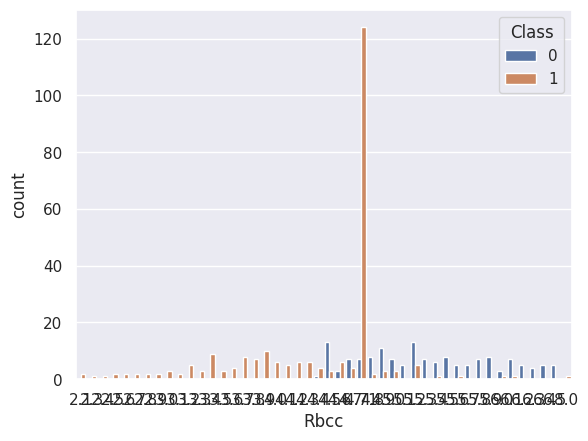

In [ ]:
sns.countplot(x=df['Rbcc'], hue=df['Class'])

<Axes: xlabel='Bp', ylabel='count'>

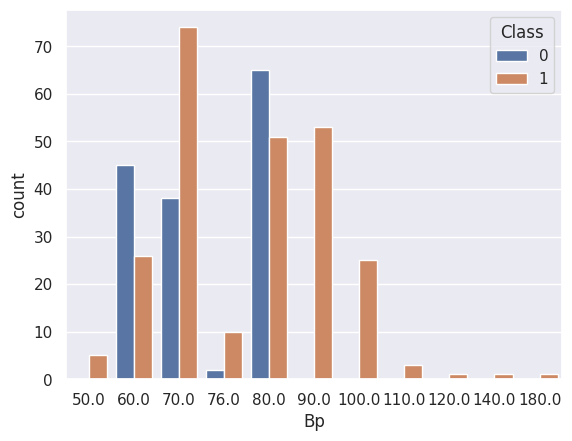

In [ ]:
sns.countplot(x=df['Bp'], hue=df['Class'])

<Axes: xlabel='Sg', ylabel='count'>

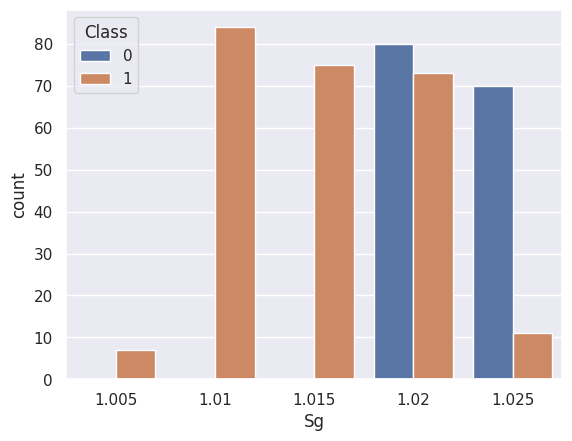

In [ ]:
sns.countplot(x=df.Sg, hue=df['Class'])

<Axes: xlabel='Al', ylabel='count'>

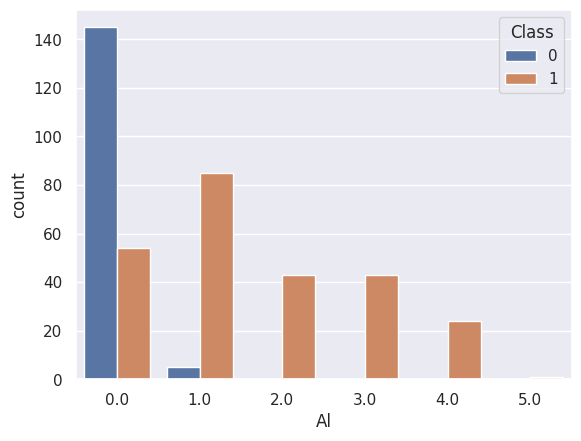

In [ ]:
sns.countplot(x=df['Al'], hue=df['Class'])

<Axes: xlabel='Rbcc', ylabel='Count'>

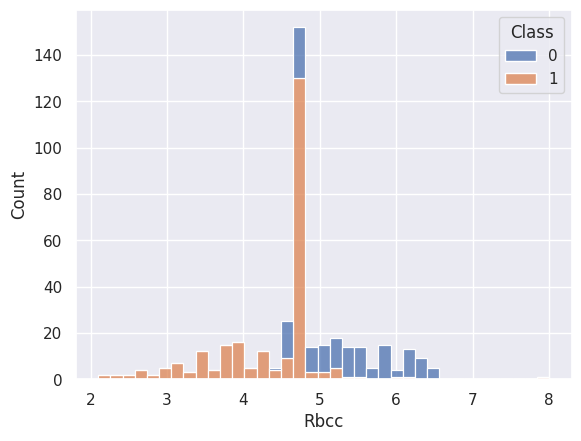

In [ ]:
sns.histplot(x=df.Rbcc,multiple="stack",hue=df.Class)

<Axes: xlabel='Sg', ylabel='Count'>

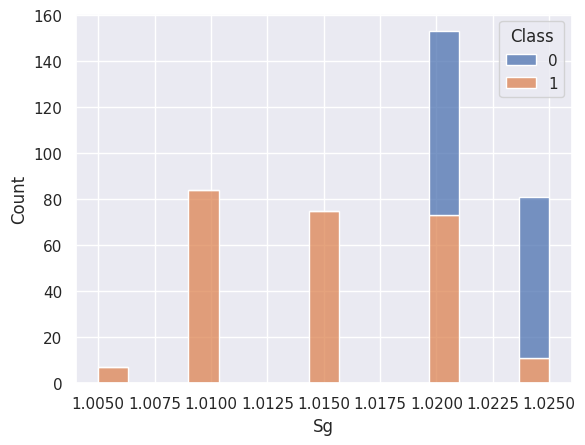

In [ ]:
sns.histplot(x=df.Sg,multiple="stack",hue=df.Class)

<Axes: xlabel='Wbcc', ylabel='Count'>

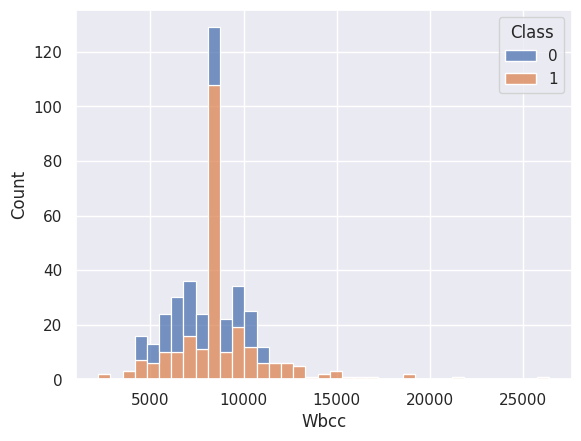

In [ ]:
sns.histplot(x=df.Wbcc,multiple="stack",hue=df.Class)

In [ ]:
df.isnull().sum()

Bp       0
Sg       0
Al       0
Su       0
Rbc      0
Bu       0
Sc       0
Sod      0
Pot      0
Hemo     0
Wbcc     0
Rbcc     0
Htn      0
Class    0
dtype: int64

In [ ]:
df_copy = df.copy(deep=True)

In [ ]:
col_replace = ['Bp', 'Sg', 'Bu', 'Sc', 'Sod', 'Pot', 'Hemo', 'Wbcc', 'Rbcc']
df_copy[col_replace] = df[col_replace].replace(0,np.NaN)

In [ ]:
print(df_copy.isnull().sum())

Bp       0
Sg       0
Al       0
Su       0
Rbc      0
Bu       0
Sc       0
Sod      0
Pot      0
Hemo     0
Wbcc     0
Rbcc     0
Htn      0
Class    0
dtype: int64


# **Balancing the data**

<Axes: xlabel='Class', ylabel='count'>

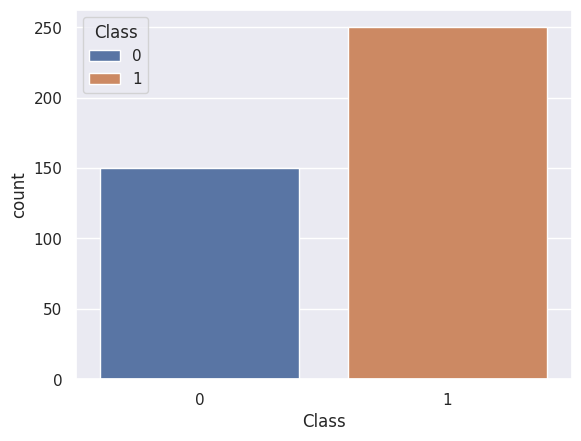

In [ ]:
sns.countplot(x=df.Class,hue=df.Class)

In [ ]:
print(df.Class.value_counts())

1    250
0    150
Name: Class, dtype: int64


In [ ]:
from sklearn.utils import resample

In [ ]:
df_mj = df[df['Class']==1]
df_mn = df[df['Class']==0]

In [ ]:
df_mn_ups = resample(df_mn,n_samples=250,random_state=0)
df2 = pd.concat([df_mn_ups,df_mj])

<Axes: xlabel='Class', ylabel='count'>

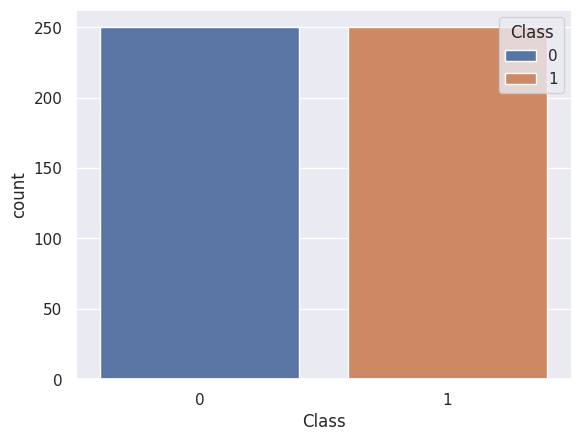

In [ ]:
sns.countplot(x=df2.Class, hue=df2.Class)

In [ ]:
print(df2.Class.value_counts())

0    250
1    250
Name: Class, dtype: int64


# **Identify Outliers**

<Axes: xlabel='Rbcc'>

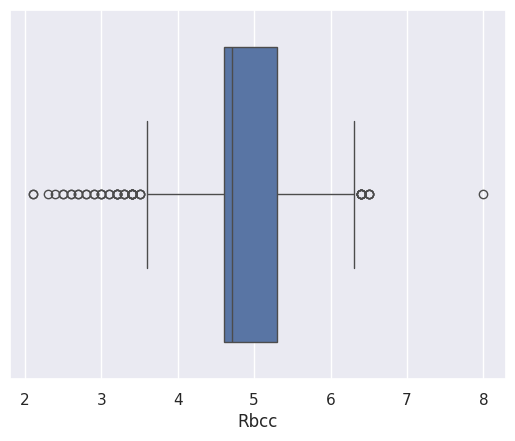

In [ ]:
sns.boxplot(x=df2.Rbcc)

<Axes: xlabel='Wbcc'>

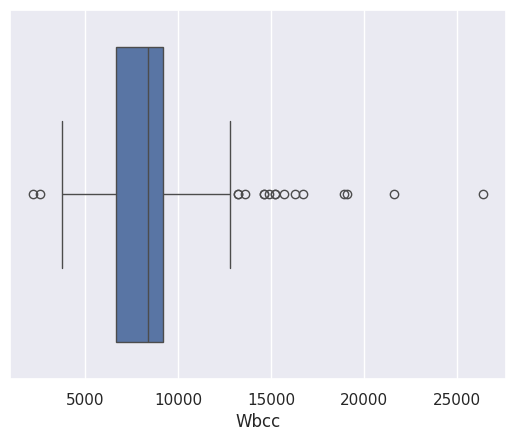

In [ ]:
sns.boxplot(x=df2.Wbcc)

<Axes: xlabel='Sg'>

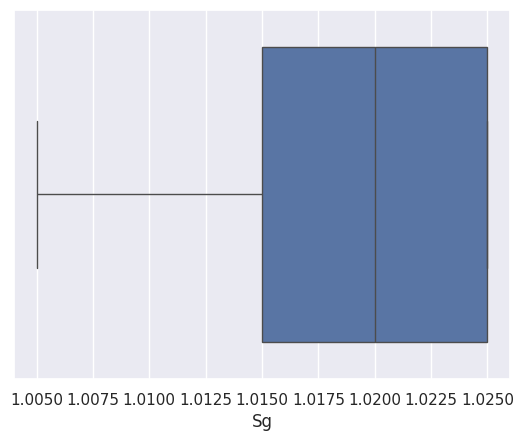

In [ ]:
sns.boxplot(x=df2.Sg)

<Axes: xlabel='Sod'>

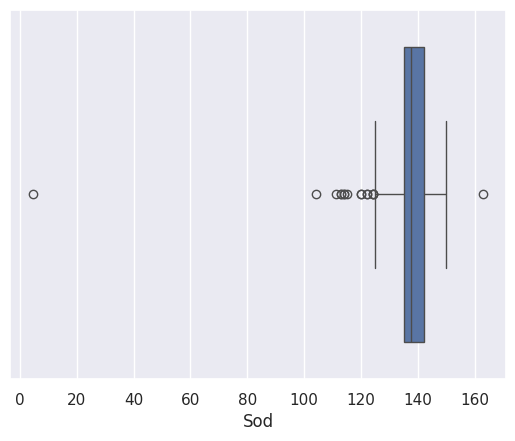

In [ ]:
sns.boxplot(x=df2.Sod)

<Axes: xlabel='Htn'>

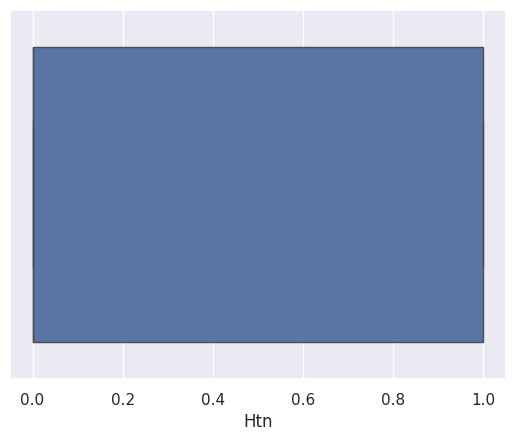

In [ ]:
sns.boxplot(x=df2.Htn)

<Axes: xlabel='Hemo'>

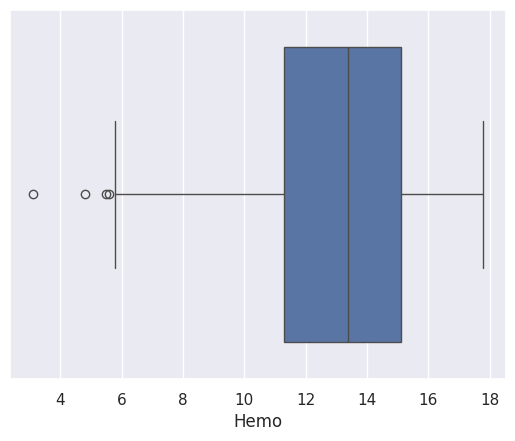

In [ ]:
sns.boxplot(x=df2.Hemo)

# **Remove Outliers using Z-Score**

In [ ]:
import scipy.stats as stats
z = np.abs(stats.zscore(df2))
data_clean = df2[(z<3).all(axis=1)]
data_clean.shape

(420, 14)

<Axes: >

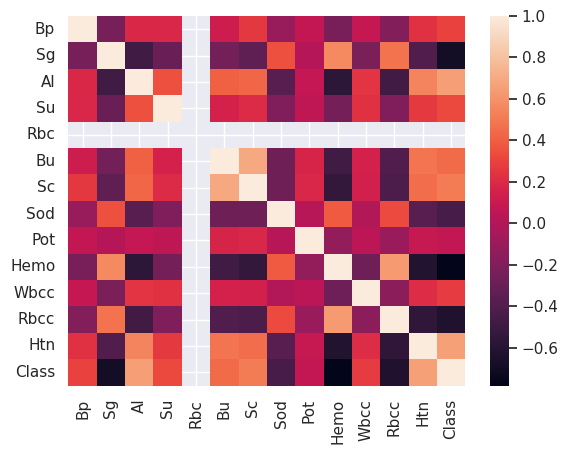

In [ ]:
sns.heatmap(data_clean.corr(),fmt='.2g')

In [ ]:
df_cleanest = df.drop(columns=['Rbc'])

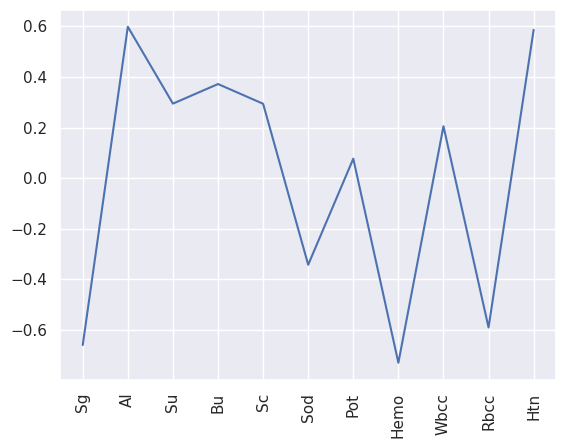

In [ ]:
corel = df_cleanest[df_cleanest.columns[1:]].corr()['Class'][:-1]
plt.plot(corel)
plt.xticks(rotation=90)
plt.show()

<Axes: >

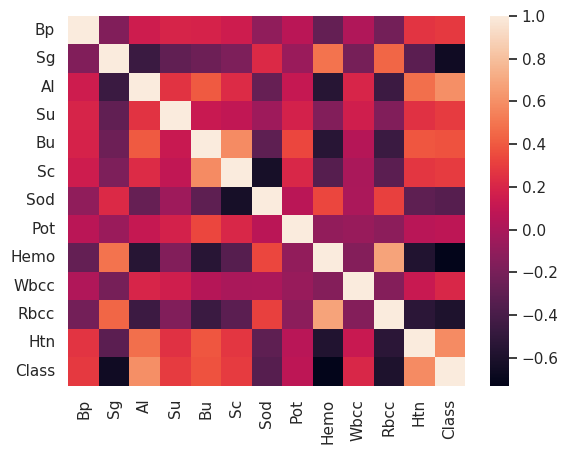

In [ ]:
sns.heatmap(df_cleanest.corr(),fmt='.2g')

# **Algorithms**

In [ ]:
X = df_cleanest.drop(columns = 'Class')
y = df_cleanest['Class']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [ ]:
y_pred = rfc.predict(X_test)
print("Accuracy Score : ",round(accuracy_score(y_test,y_pred)*100,2),"%")

Accuracy Score :  100.0 %


In [ ]:
from sklearn.metrics import f1_score,precision_score,recall_score
print('F1 score : ',(f1_score(y_test,y_pred)))
print('Precision Score : ',(precision_score(y_test,y_pred)))
print('Recall Score',recall_score(y_test,y_pred))

F1 score :  1.0
Precision Score :  1.0
Recall Score 1.0


Text(0.5, 1.0, 'Accuracy Score : 100.0')

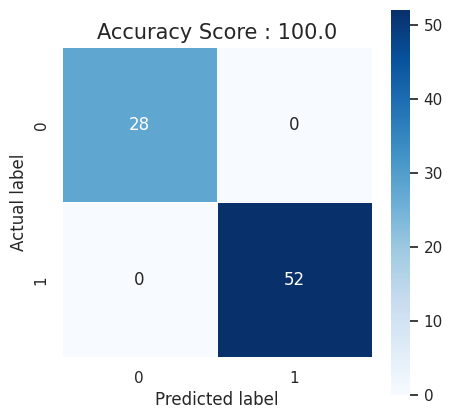

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize = (5,5))
sns.heatmap(data=cm,linewidths=0.5,annot=True,square=True,cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score : {0}'.format(rfc.score(X_test,y_test)*100)
plt.title(all_sample_title, size = 15)

# **K Nearest Neighbour**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 62.5 %


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))

F-1 Score :  0.6875
Precision Score :  0.75
Recall Score :  0.6346153846153846


Text(0.5, 1.0, 'Accuracy Score: 62.5')

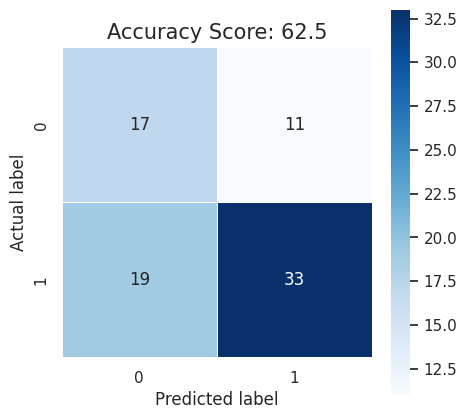

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(knn.score(X_test, y_test)*100)
plt.title(all_sample_title, size = 15)

# **Adaboost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(random_state=0)
ada.fit(X_train,y_train)

AdaBoostClassifier(random_state=0)

accuracy score: 98.75 %
F-1 Score: 0.9902912621359222
Precision Score: 1.0
Recall Score: 0.9807692307692307


Text(0.5, 1.0, 'accuracy score:98.75')

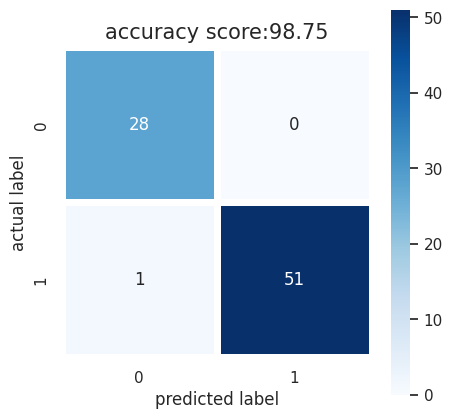

In [ ]:
y_pred=ada.predict(X_test)
print("accuracy score:",round(accuracy_score(y_test,y_pred)*100,2),"%")
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
print("F-1 Score:",(f1_score(y_test,y_pred)))
print("Precision Score:",(precision_score(y_test,y_pred)))
print("Recall Score:",(recall_score(y_test,y_pred)))
from sklearn.metrics import classification_report,confusion_matrix
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=5,annot=True,square=True,cmap='Blues')
plt.ylabel('actual label')
plt.xlabel('predicted label')
all_sample_title='accuracy score:{0}'.format(ada.score(X_test,y_test)*100)
plt.title(all_sample_title,size=15)

# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=0)
lr.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

Accuracy score: 93.75 %
F-1 Score: 0.95
Precision Score: 0.98
Recall Score: 0.923


Text(0.5, 1.0, 'accuracy score:93.75')

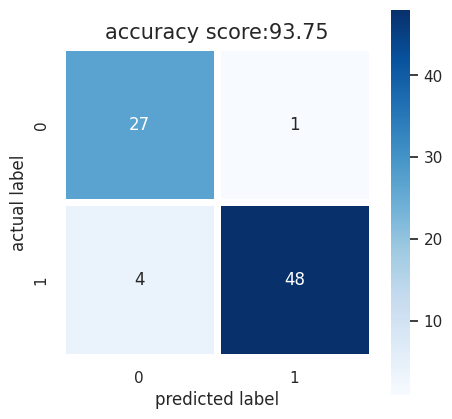

In [ ]:
y_pred=lr.predict(X_test)
print("Accuracy score:",round(accuracy_score(y_test,y_pred)*100,2),"%")
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
print("F-1 Score:",round((f1_score(y_test,y_pred)),3))
print("Precision Score:",round((precision_score(y_test,y_pred)),3))
print("Recall Score:",round((recall_score(y_test,y_pred)),3))
from sklearn.metrics import classification_report,confusion_matrix
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=5,annot=True,square=True,cmap='Blues')
plt.ylabel('actual label')
plt.xlabel('predicted label')
all_sample_title='accuracy score:{0}'.format(lr.score(X_test,y_test)*100)
plt.title(all_sample_title,size=15)